In [1]:
%load_ext autoreload
%autoreload 2

In [20]:
import os
import sys

# Add the parent directory to the Python path
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), os.pardir)))

import dataloader
import modules 
import plots
import utilities
from trainer import Trainer
import torch 
import matplotlib.pyplot as plt
from matplotlib_style import setup_matplotlib_environment, theme_categorical_bright

from IPython.display import display, Markdown


In [3]:
setup_matplotlib_environment()

# Test on Kaggle Housing Dataset

## Train a test model

To begin with, we will train a simple model on the Kaggle House Prices dataset. We will use a simple MLP with a two hidden layers, each with 32 neurons. Since the Kaggle dataset doesn't have a validation set, we will eventually use a 5-fold cross validation to evaluate the model, but in this initial example let's just see if we can reduce the training error.

In [4]:
ames_house_price_data = dataloader.KaggleHouse(batch_size=64)
ames_house_price_data.preprocess()

In [5]:
network_architecture = [32, 32]
model = modules.LinearReLUMLP(network_architecture, learning_rate=0.006, weight_decay=0.1)

/Users/patrickrowe/miniconda3/envs/main/lib/python3.12/site-packages/torch/nn/modules/lazy.py:181: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


In [6]:
trainer = Trainer(max_epochs=25, init_random=42)
trainer.fit(model, ames_house_price_data)

Model running on cpu
Epoch 25/25: Train Loss: 0.2269, Val Loss: nan


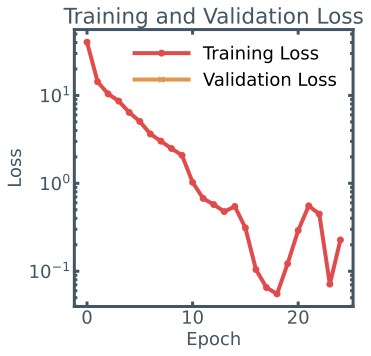

In [7]:
losses = utilities.extract_training_losses(trainer.metadata)
fig, ax = plots.plot_training_validation_loss(losses['avg_train_losses'], losses['avg_val_losses'])
ax.set_yscale('log')

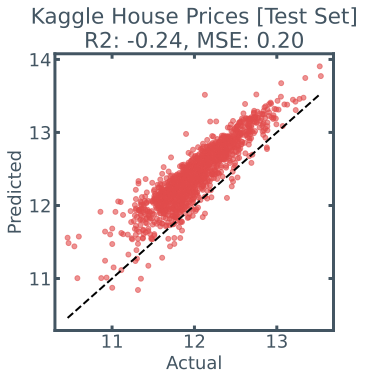

In [8]:
fig, ax = plots.correlate_y_vs_yhat(*utilities.get_model_predictions(model, ames_house_price_data, train=True), title="Kaggle House Prices [Test Set]")

# K-Fold Cross-Validation

In [9]:

k = 5
k_fold_datasets = []
k_fold_models = []

for n in range(k):
    k_fold_datasets.append(dataloader.KFoldDataSet.from_dataset(dataset=ames_house_price_data, k=k, n=n))
    k_fold_models.append(modules.LinearReLUMLP(network_architecture, learning_rate=0.006, weight_decay=0.1))


/Users/patrickrowe/miniconda3/envs/main/lib/python3.12/site-packages/torch/nn/modules/lazy.py:181: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '
/Users/patrickrowe/miniconda3/envs/main/lib/python3.12/site-packages/torch/nn/modules/lazy.py:181: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '
/Users/patrickrowe/miniconda3/envs/main/lib/python3.12/site-packages/torch/nn/modules/lazy.py:181: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '
/Users/patrickrowe/miniconda3/envs/main/lib/python3.12/site-packages/torch/nn/modu

In [10]:
trainers = []

for model, data in zip(k_fold_models, k_fold_datasets):
    trainer = Trainer(max_epochs=25, init_random=42)
    trainer.fit(model, data)
    trainers.append(trainer)

Model running on cpu
Epoch 25/25: Train Loss: 0.0630, Val Loss: 0.07359
Model running on cpu
Epoch 25/25: Train Loss: 0.0499, Val Loss: 0.11032
Model running on cpu
Epoch 25/25: Train Loss: 0.1611, Val Loss: 0.07450
Model running on cpu
Epoch 25/25: Train Loss: 0.1460, Val Loss: 0.17409
Model running on cpu
Epoch 25/25: Train Loss: 0.0363, Val Loss: 0.06051


## Model Trained on cross-validation set 1/5

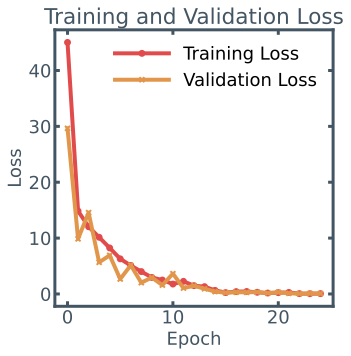

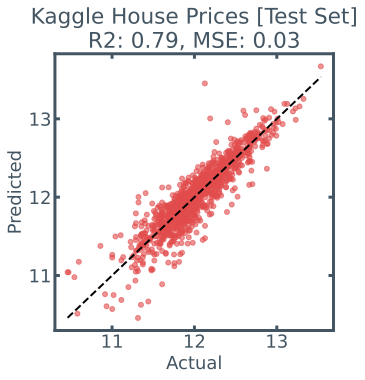

## Model Trained on cross-validation set 2/5

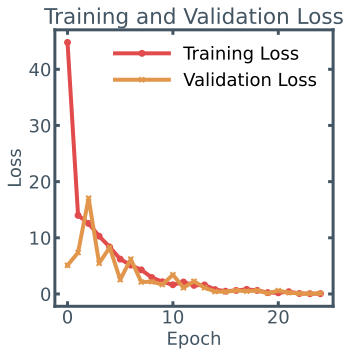

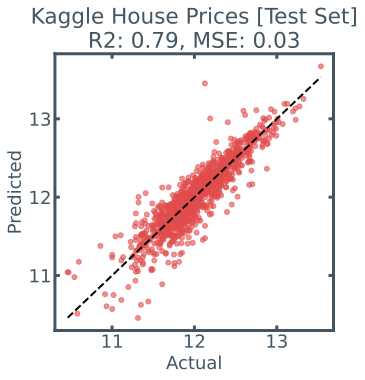

## Model Trained on cross-validation set 3/5

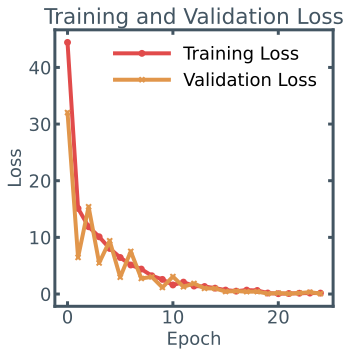

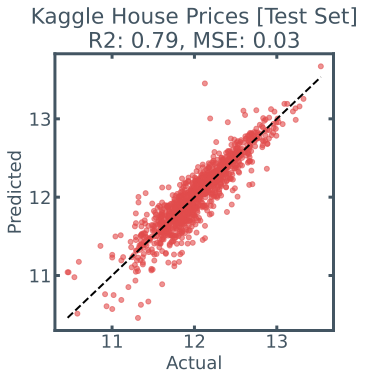

## Model Trained on cross-validation set 4/5

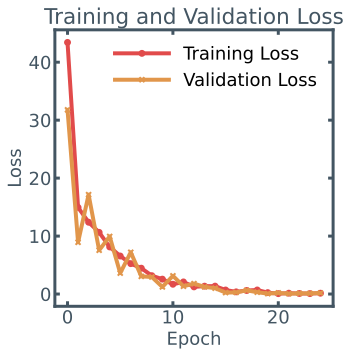

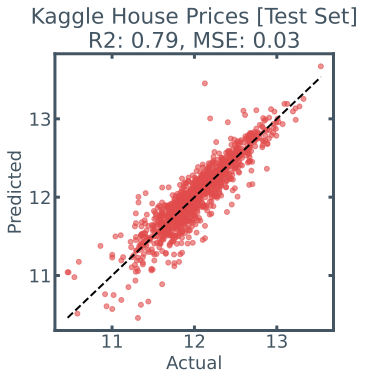

## Model Trained on cross-validation set 5/5

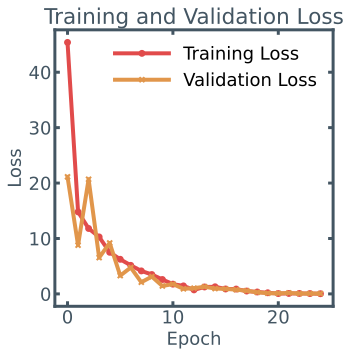

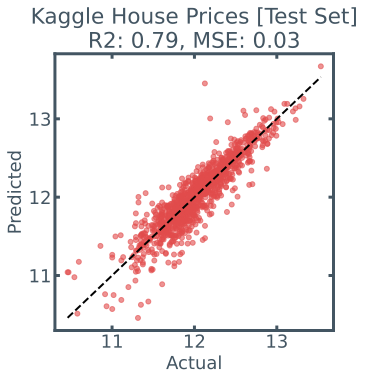

In [22]:
for i, trainer in enumerate(trainers):
    display(Markdown(f"## Model Trained on cross-validation set {i+1}/{k}"))

    losses = utilities.extract_training_losses(trainer.metadata)
    fig, ax = plots.plot_training_validation_loss(losses['avg_train_losses'], losses['avg_val_losses'])
    fig, ax = plots.correlate_y_vs_yhat(*utilities.get_model_predictions(model, data, train=True), title="Kaggle House Prices [Test Set]")
    plt.show()
